In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('7 churn_prediction.csv')
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


## 1. treating variables

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [4]:
data.dtypes[data.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

In [5]:
data['customer_nw_category']=data['customer_nw_category'].astype('category') ##ordinal categorical
data['branch_code']= data['branch_code'].astype('category') ## various branches category
data['churn']= data['churn'].astype('category') ## 0 and 1 are classes so category

In [6]:
data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

In [7]:
data['dependents'].unique()

array([ 0., nan,  2.,  3.,  1.,  7.,  4.,  6.,  5.,  9., 52., 36., 50.,
        8., 25., 32.])

In [8]:
data['dependents'] = data['dependents'].astype('Int64') ## dependents should whole nums
data['city'] = data['city'].astype('category')  ## cities are different so category 

In [9]:
data['gender']= data['gender'].astype('category')  ## male female categorical variable
data['occupation']= data['occupation'].astype('category') ## we should divide people with various occupation

In [10]:
## we have last transaction as datetime datatype
## creating instance
date = pd.DatetimeIndex(data['last_transaction'])

In [11]:
## extracting seperate variables for days, week, month and day in week from dates shown in 'last transaction' column

## last transaction on day of year
data['DOY_ls_tran'] = date.dayofyear

## last transaction on week of year
data['WOY_ls_tran'] = date.weekofyear

## last transaction in month of year
data['MOY_ls_tran'] = date.month

## last transaction in day of week
data['DOW_ls_tran'] = date.dayofweek

data = data.drop(columns = ['last_transaction']) ## dropped but due to double running cell
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   customer_id                     28382 non-null  int64   
 1   vintage                         28382 non-null  int64   
 2   age                             28382 non-null  int64   
 3   gender                          27857 non-null  category
 4   dependents                      25919 non-null  Int64   
 5   occupation                      28302 non-null  category
 6   city                            27579 non-null  category
 7   customer_nw_category            28382 non-null  category
 8   branch_code                     28382 non-null  category
 9   current_balance                 28382 non-null  float64 
 10  previous_month_end_balance      28382 non-null  float64 
 11  average_monthly_balance_prevQ   28382 non-null  float64 
 12  average_monthly_ba

<ipython-input-11-1b2c17cf56e5>:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['WOY_ls_tran'] = date.weekofyear


In [12]:
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,DOY_ls_tran,WOY_ls_tran,MOY_ls_tran,DOW_ls_tran
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,0.20,1458.71,1458.71,0,141.0,21.0,5.0,1.0
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,0.56,5486.27,100.56,6496.78,8787.61,0,305.0,44.0,11.0,4.0
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,<NA>,self_employed,1020.0,2,582,2291.91,...,0.47,0.47,2143.33,2291.91,1669.79,1,218.0,32.0,8.0,1.0
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,714.61,588.62,1538.06,1157.15,1677.16,1,307.0,44.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0,student,1020.0,2,1207,1076.43,...,0.30,0.30,0.30,1076.43,1076.43,0,295.0,43.0,10.0,1.0
28378,30298,1537,34,Female,0,self_employed,1046.0,2,223,3844.10,...,2.29,901.00,1014.07,3738.54,3690.32,0,351.0,51.0,12.0,1.0
28379,30299,2376,47,Male,0,salaried,1096.0,2,588,65511.97,...,3883.06,168.23,71.80,61078.50,57564.24,1,365.0,1.0,12.0,1.0
28380,30300,1745,50,Male,3,self_employed,1219.0,3,274,1625.55,...,0.20,0.20,0.20,1625.55,1625.55,0,NaN,NaN,NaN,NaN


## univariate analysis : num variables

In [13]:
data.select_dtypes(include = ['int64', 'float64', 'Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
DOY_ls_tran                       float64
WOY_ls_tran                       float64
MOY_ls_tran                       float64
DOW_ls_tran                       float64
dtype: object

In [14]:
#segregating variables into groups
cust_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
prev_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
transaction_date = ['DOY_ls_tran','WOY_ls_tran','MOY_ls_tran','DOW_ls_tran']

In [15]:
len(cust_details)

3

In [16]:
# custom function for efficient univariate analysis of num variables

def UVA_numeric(data, var_group):
##takes variable group and gives descriptive analysis of it and also plots it.
  
  size = len(var_group)
  plt.figure(figsize = (7*size, 4), dpi= 100)
    
  #looping each variable 
  for j,i in enumerate(var_group):
        
        #calculating descriptives
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        std_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        #calsculating points for std_dev
        points = mean-std_dev, mean + std_dev
        
        #plotting variable with every info
        plt.subplot(1, size, j+1)
        sns.kdeplot(data[i], shade = True)
        sns.lineplot(x=points, y=[0,0], color = 'black', label = 'std_dev', linewidth = 1)
        sns.scatterplot(x=[mini, maxi], y=[0,0], color = 'yellow', label = 'min/max')
        sns.scatterplot(x=[mean], y=[0], color ='red', label ='mean')
        sns.scatterplot(x=[median], y=[0], color = 'green', label = 'median')
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {} ; kurtosis = {} ;\nskew = {}; range = {};\nmean = {} ; median= {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                         round(kurt,2),
                                                                                                         round(skew,2),
                                                                                                         (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                         round(mean, 2),
                                                                                                         round(median,2)))

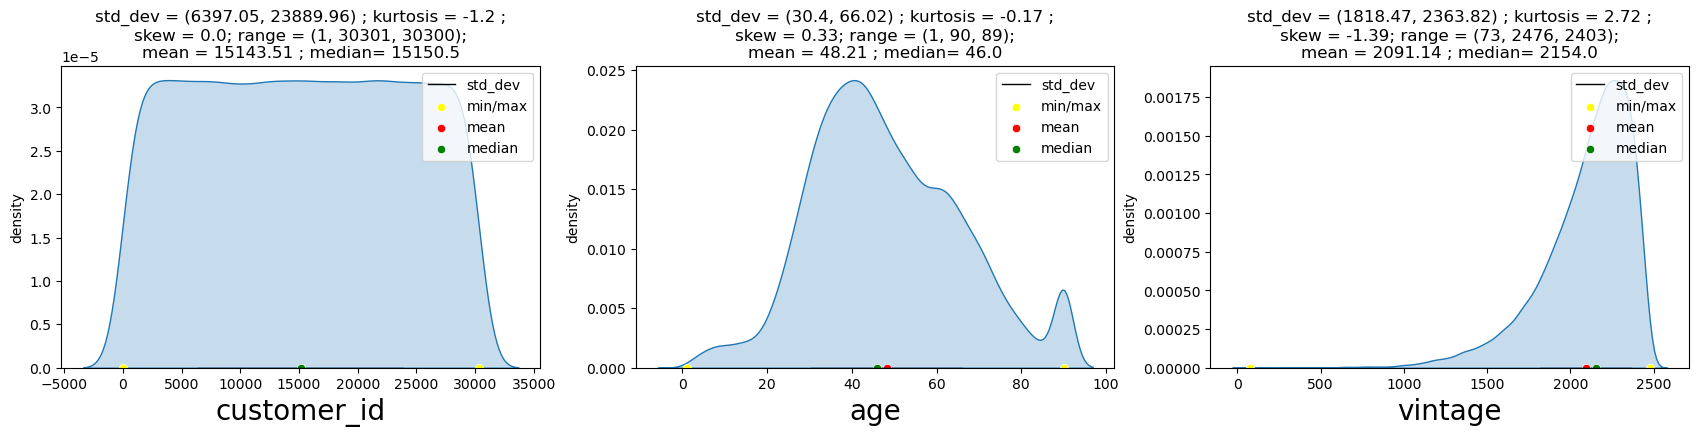

In [17]:
UVA_numeric(data,cust_details)

**Summary of Customer_Information:**
*    **customer_id**:
     *    variable is **unique for every customer, Hence uniform** distribution.
     * This variable **does not contribute any information**
     * Can be eliminated from data

*    **age**:
    *    Median Age = 46
    *    **Most customers age between 30 to 66**
    *    skewness +0.33 : customer age is **negligibly biased towards younger age**
    *    **kurtosis = -0.17**; very less likely to have extreme/outlier values.
*    **vintage:**
    *    Most customers joined between 2100 and 2650 days from the day of data extraction.
    *    **skewness** -1.42 : this is left skewed, **vintage variable is significantly biased towards longer association of customers.**
    *    **Kurtosis = 2.93**: Extreme values and Outliers are very likely to be present in vintage.

**Things to Investigate Further down the road:**
*    The batch of **high number of very Old Age customers** in age variable.

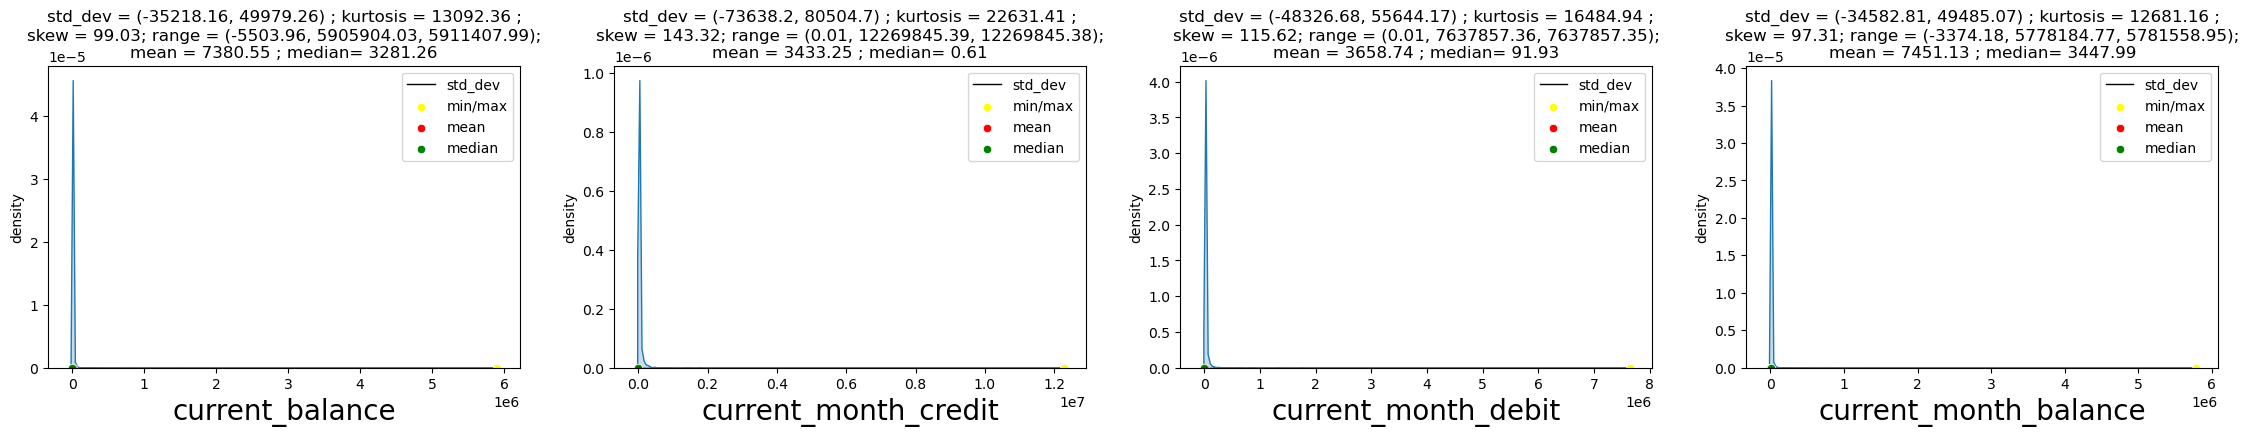

In [18]:
UVA_numeric(data,current_month)

In [19]:
## in above plots considering values of skewness and kurtosis, extreme outliers are posible 
## we need to remove outliers
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[current_month]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor*cm_data['current_month_balance'].std()]

# checking how many points removed
len(data), len(cm_data)

(28382, 27113)

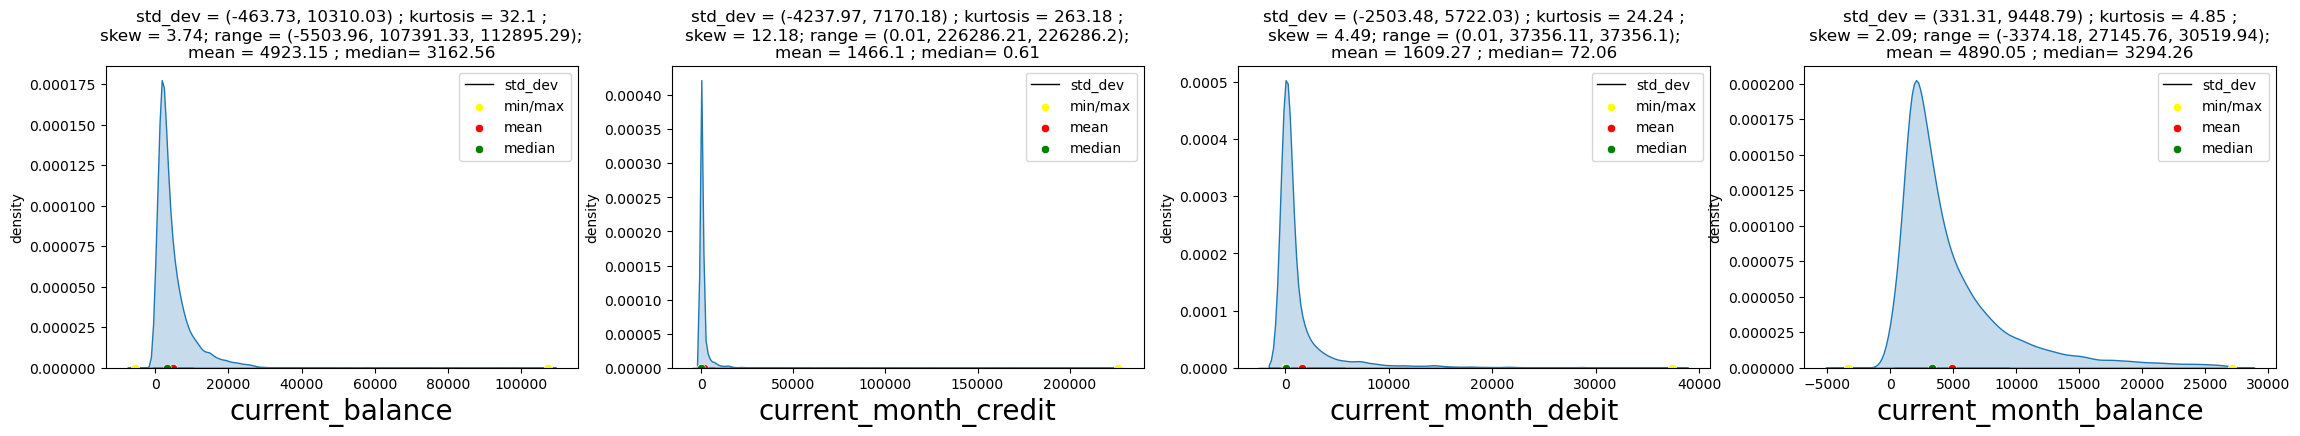

In [20]:
UVA_numeric(cm_data, current_month)

**Summary of current_month**
*    After Removing extreme/outliers, plots are still very skewed.

**Things to investigate further down**
1.    **Is there thete any common trait/relation between the customers who are performing high transaction credit/debits?**
2.    **Customers who are performinng high amount of transactions, are they doinng it every month?**

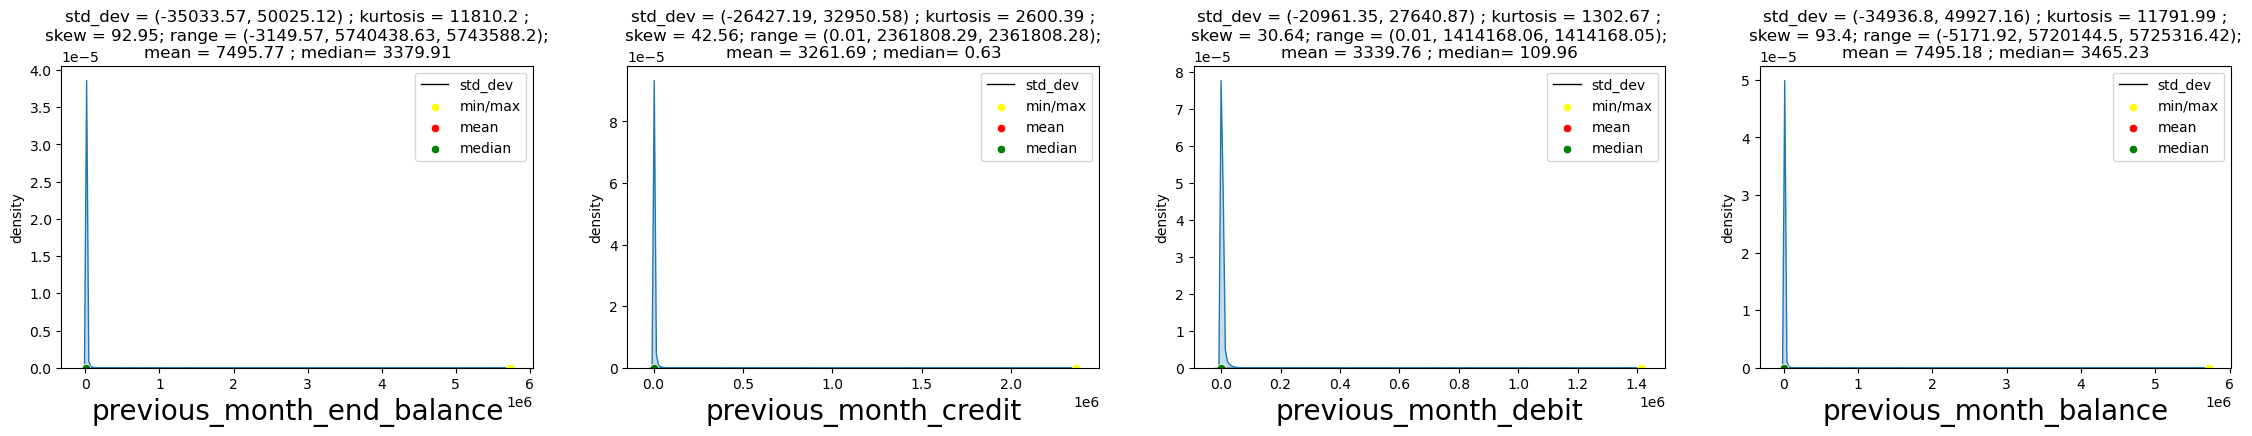

In [21]:
UVA_numeric(data, prev_month)

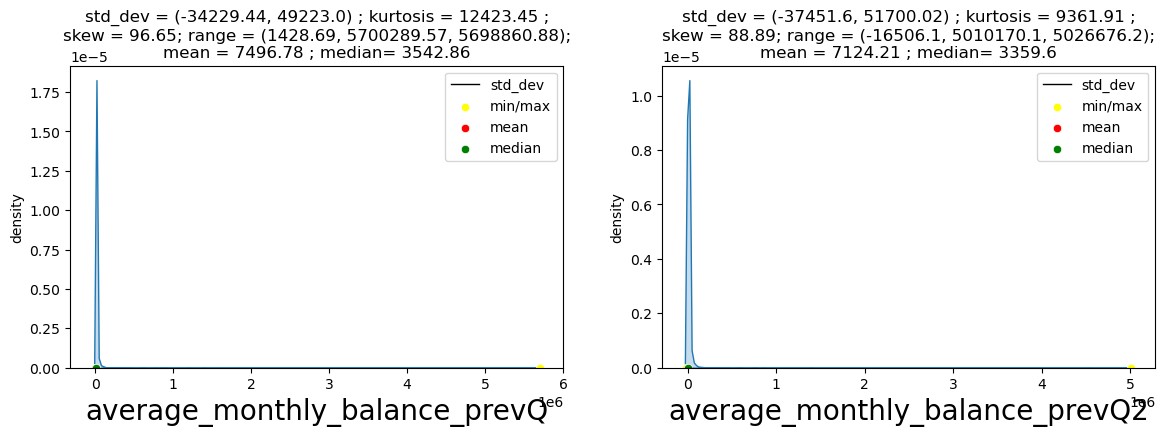

In [22]:
## it looks like most of customers are doing low amount of transactions.
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
UVA_numeric(data,previous_quarters)

**Summary**
The general trend still follows, it is crutial that we find out if there is any common trait between the customers doing high amount of transactions.

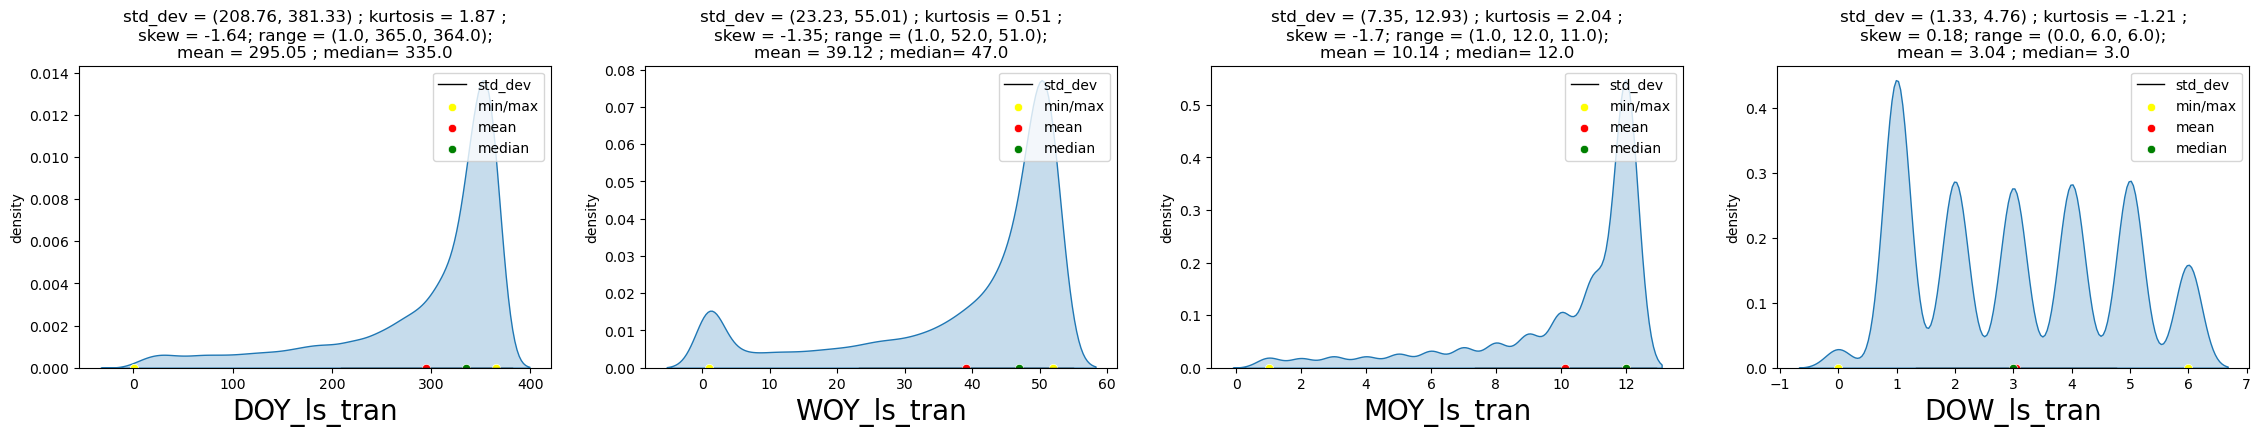

In [23]:
UVA_numeric(data,transaction_date)

**Summary**
*    **Day_of_Year**:
    *    most of the last transactions were made in the last 60 days of the extraction of data.
    *    There are transactions which were made also an year ago.

*   **Week_of_year and Month_of_year**: these variable validate the findings from the **day_of_year**.
*    **Day_of_Week**: Tuesdays are often the favoured day relative to others.

**Things to investigate further Down**
*    **Customers whose last transaction was 6 months ago, did all of them churn?**

## univariate analysis : categorical variable

In [24]:
data.select_dtypes(exclude = ['Int64', 'float64', 'int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [25]:
## grouping variables
customer_info = ['gender', 'occupation', 'customer_nw_category']
bank_info = ['city', 'branch_code']

In [26]:
## creating custom function for visualisation of categorical variable 
## it takes data and variable group and print value counts and bargraph
def UVA_cat(data, var_group):
    
    size = len(var_group)
    plt.figure(figsize =(7*size, 3), dpi=100)
    
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)
        n_unique = data[i].nunique()
        
    #plotting each variable
        plt.subplot(1, size, j+1)
        sns.barplot(x= norm_count , y = norm_count.index, order = norm_count.index)
        plt.xlabel('fraction/percent')
        plt.ylabel('{}'.format(i), fontsize= 15)
        plt.title('n_unique ={} \n value counts \n {}'.format(n_unique, norm_count))

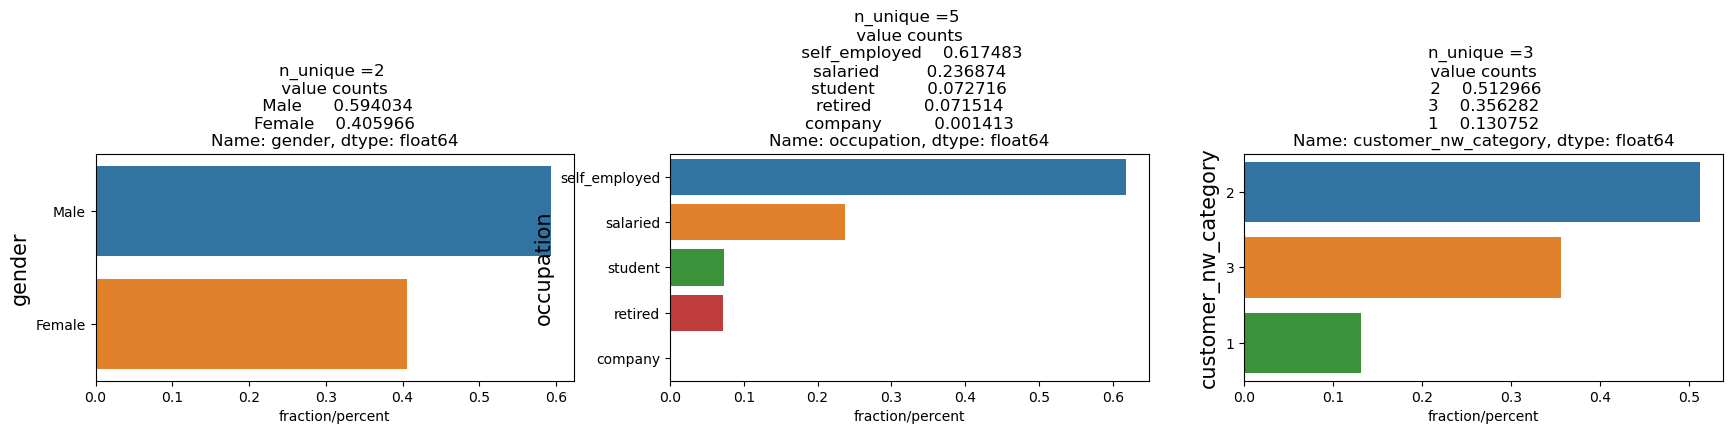

In [27]:
UVA_cat(data, customer_info)

**Summary**
* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* Gender:
  *  Males accounts are 1.5 times more than Female Accounts.

* customer_nw_category:
  *  Half of all the accounts belong to the 3rd net worth category.
  *  Less than 15% belong to the highest net worth category.

**Things to investigate further down:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

(0.0, 0.02)

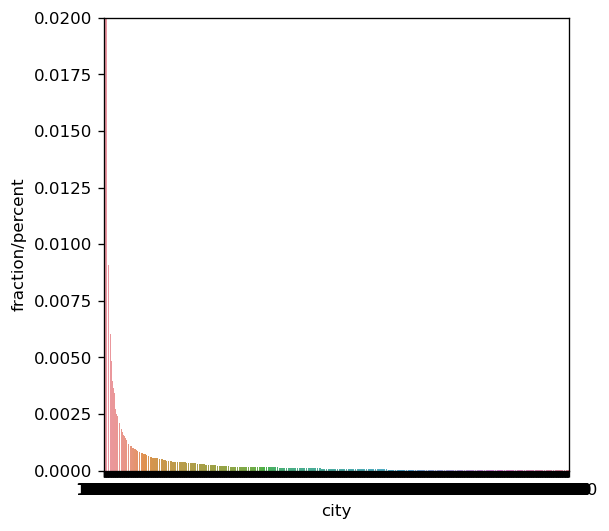

In [28]:
#plotting 'city'
plt.figure(figsize = (5,5), dpi =120)
city_count = data['city'].value_counts(normalize = True)
sns.barplot(x = city_count.index, y= city_count, order = city_count.index)
plt.xlabel('city')
plt.ylabel('fraction/percent')
plt.ylim(0, 0.02)

Text(0, 0.5, 'fraction/percent')

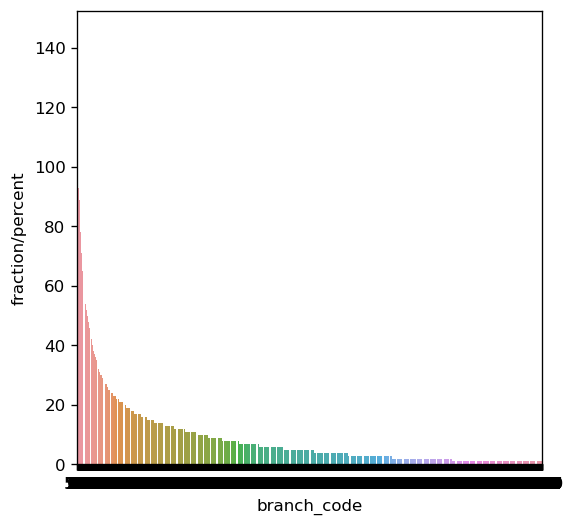

In [29]:
#plotting 'branch code'
plt.figure(figsize = (5,5), dpi = 120)
branch_count = data['branch_code'].value_counts()
sns.barplot(x= branch_count.index, y= branch_count , order = branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')

**Summary:**
for both variable "city" and "branch_code", there are too many categories. There is clear relation that some branches and cities are more popular with customers and and this trend decreases rapidly.

**Things to investigate further Down**
* Popular cities and branch code might be able to explain the skewness and outliers of credit/debit variables.
* Possibility that cities and branch code with very few accounts may lead to churning.

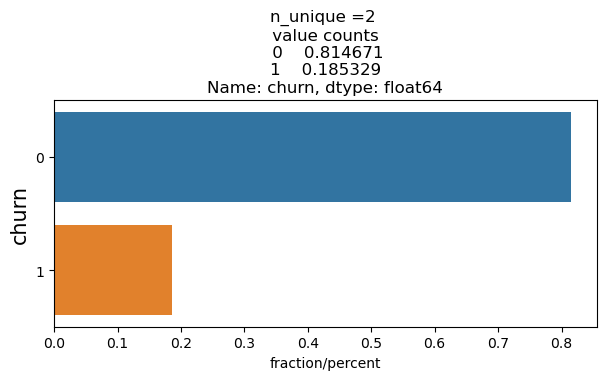

In [30]:
UVA_cat(data, ['churn'])

**summery** 
* no of persons churned is 1/4 th of no of persons who did not churn.

## Univariate: missing values

In [31]:
# finding number of missing values in every variable
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
DOY_ls_tran                       3223
WOY_ls_tran                       3223
MOY_ls_tran                       3223
DOW_ls_tran                       3223
dtype: int64

**Things to investigate further down:**
*    Gender: Do the customers with missing gender values have some common behaviour in-
  * churn: do missing values have any relation with churn?

* Dependents:
 * Missing values might be similar to zero dependents
 * churn: do missing values have any relation with churn?

* Occupation:
 * Do missing values have similar behaviour to any other occupation
 * do they have some relation with churn?

* city:
  * the respective cities can be found using branch_code

* last_transaction:
  * checking their previous month and current month and previous_quarter activity might give insight on their last transaction.

* For almost all the above:

  * vintage: might be recording errors from same period of joining
  * branch_code: might be recording error from certain branch


## Univariate Analysis: Outliers

In [32]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(y = data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(y = data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

## current month and previous month

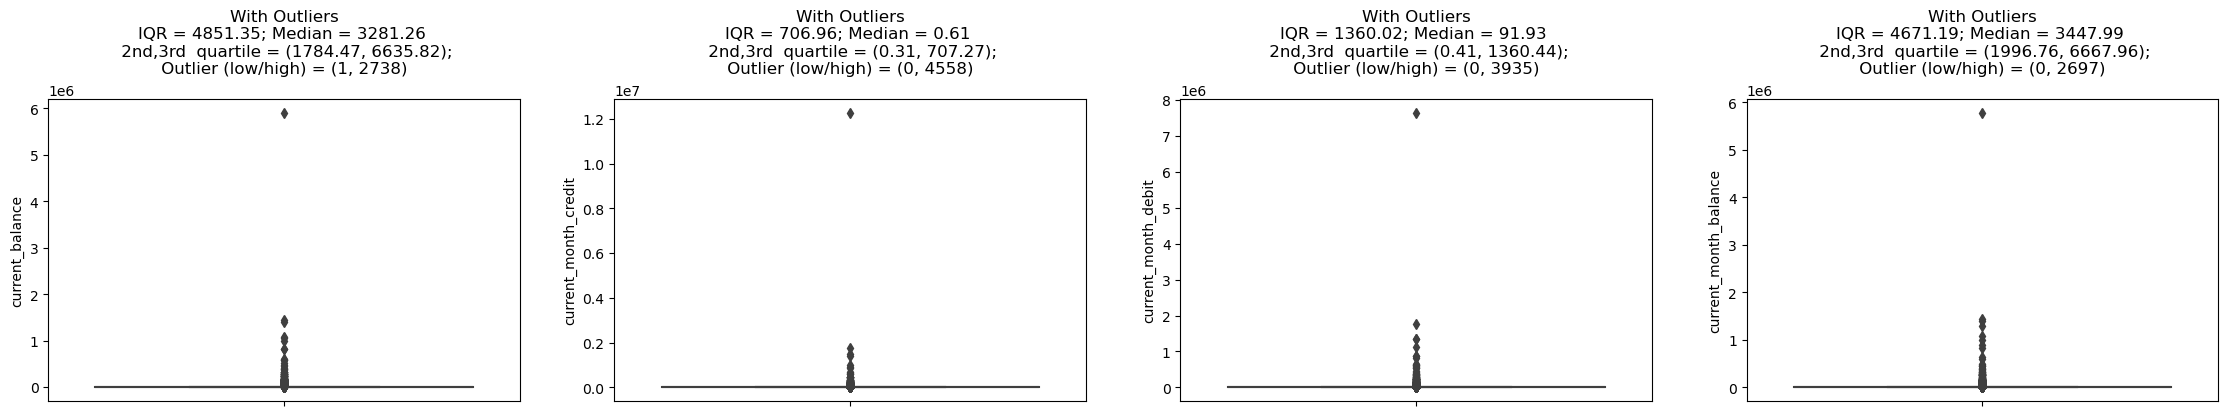

In [33]:
UVA_outlier(data, current_month, include_outlier = True)

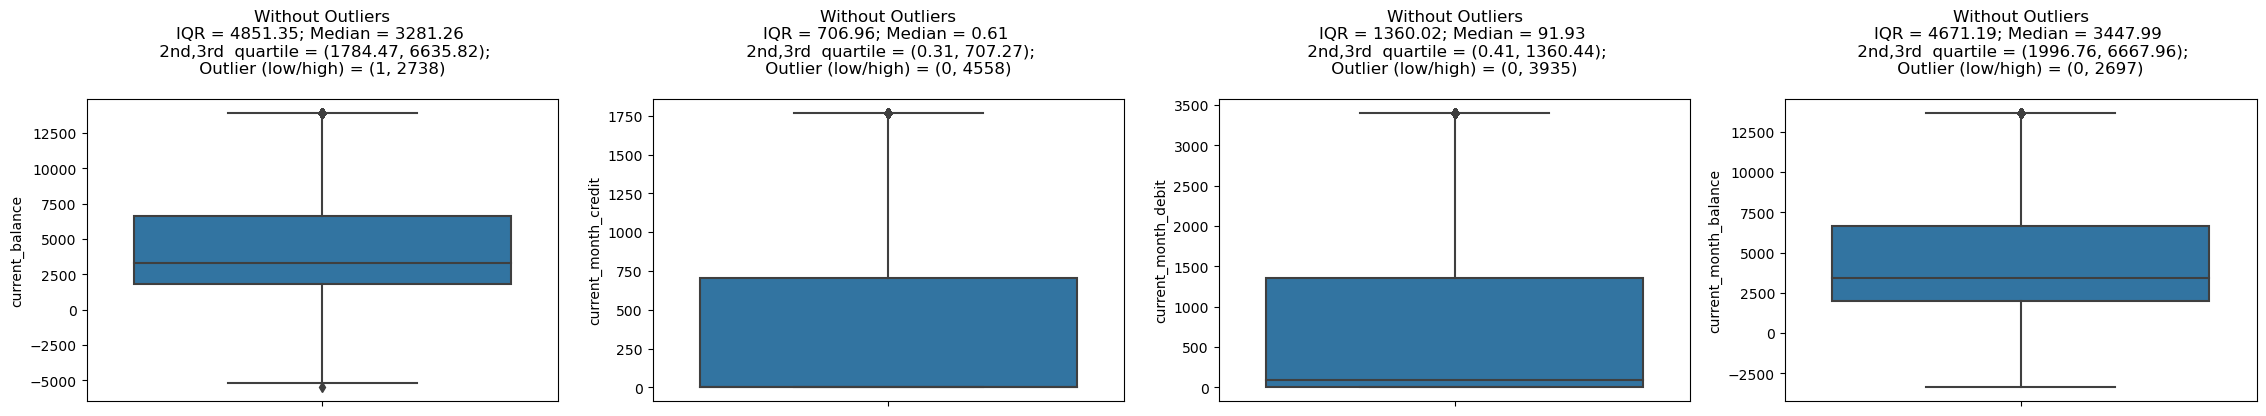

In [34]:
UVA_outlier(data, current_month, include_outlier = False)

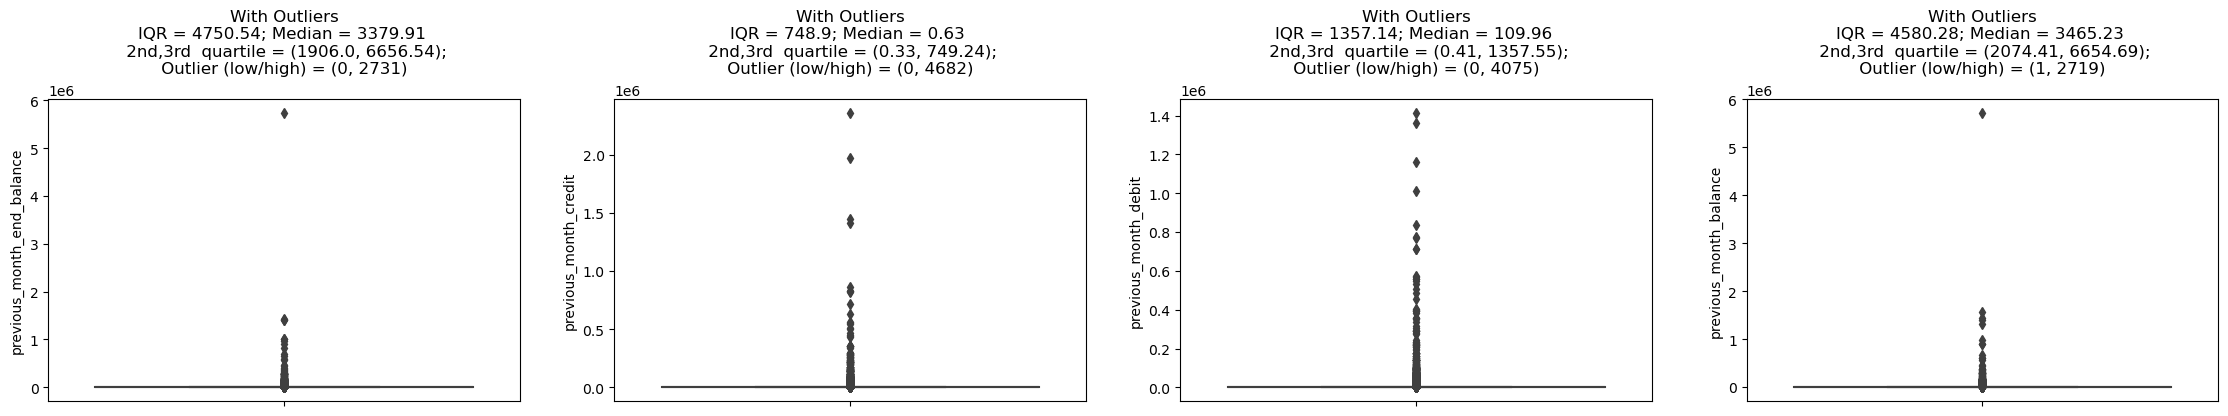

In [35]:
UVA_outlier(data, prev_month, include_outlier = True)

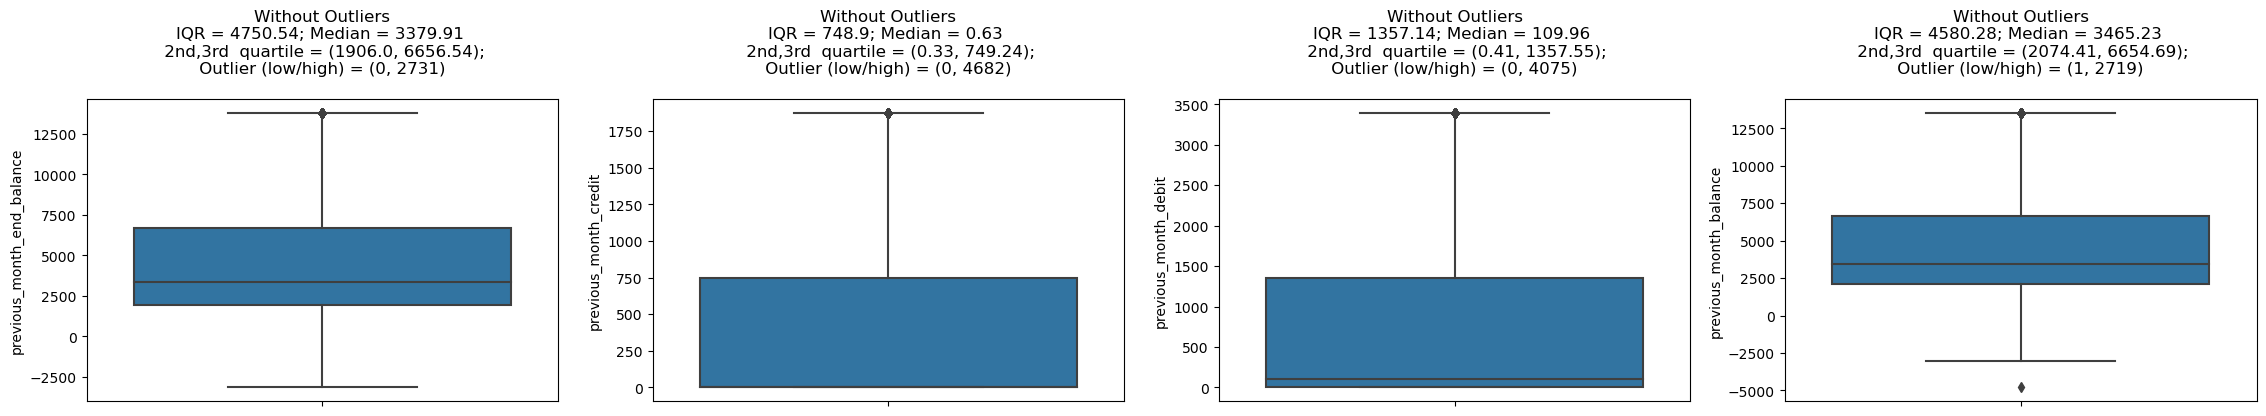

In [36]:
UVA_outlier(data, prev_month, include_outlier = False)

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

## Previous quarters 

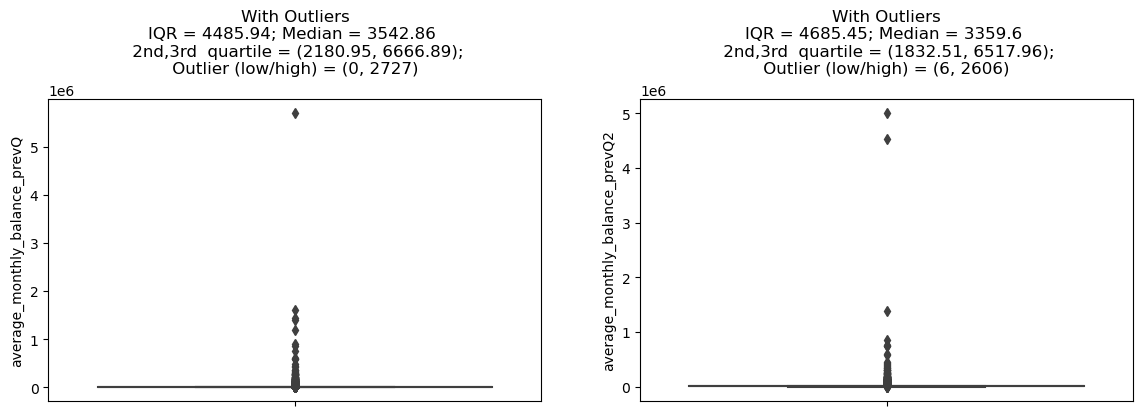

In [37]:
UVA_outlier(data,previous_quarters)

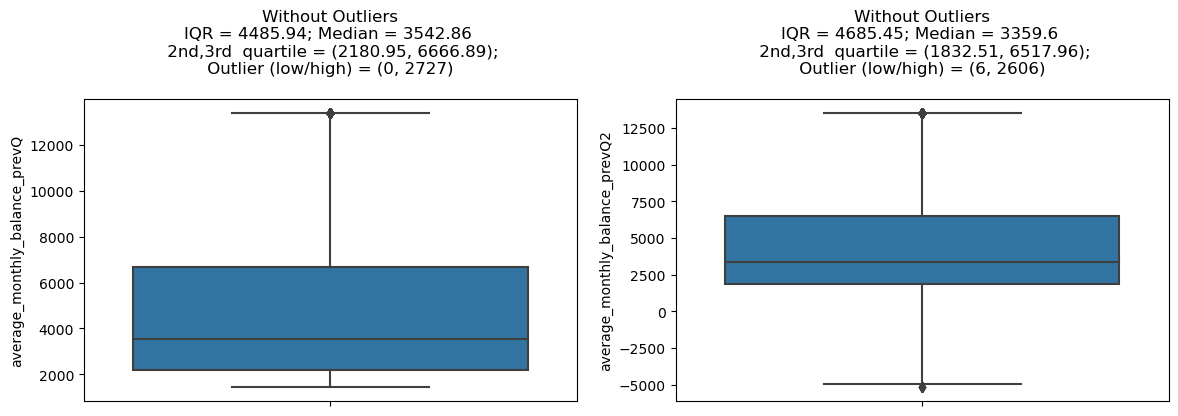

In [38]:
UVA_outlier(data,previous_quarters, include_outlier = False)

Summary:
* Outliers in previous two quarters are very similar but significantly large in number.

## Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2.  Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn? 
5. Possibility that cities and branch code with very few accounts may lead to churning.

## Bivariate analysis : num - num

In [39]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
DOY_ls_tran                       float64
WOY_ls_tran                       float64
MOY_ls_tran                       float64
DOW_ls_tran                       float64
dtype: object

## correlation matrix

In [40]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,DOY_ls_tran,WOY_ls_tran,MOY_ls_tran,DOW_ls_tran
customer_id,1.000000,-0.011288,0.001397,-0.009737,0.014989,0.012414,0.011372,0.008060,0.004223,-0.004819,0.004870,-0.005906,0.012085,0.011025,-0.006114,0.011344,-0.005374,0.009665
vintage,-0.011288,1.000000,0.003170,0.005109,-0.007223,-0.008001,-0.010858,-0.003824,-0.004821,-0.000410,-0.004899,-0.007777,-0.008703,-0.010439,-0.000680,-0.010040,-0.001359,-0.009683
age,0.001397,0.003170,1.000000,-0.003809,0.058925,0.062775,0.070903,0.081361,0.023921,0.027678,0.025366,0.027717,0.063120,0.067712,0.010754,0.000501,0.011970,-0.020895
dependents,-0.009737,0.005109,-0.003809,1.000000,-0.004554,-0.000826,0.000121,0.002584,0.002188,0.022772,0.006784,0.029073,-0.001859,0.000241,0.079740,0.034460,0.077978,-0.001702
current_balance,0.014989,-0.007223,0.058925,-0.004554,1.000000,0.809257,0.857204,0.584156,0.053329,0.101495,0.075149,0.151771,0.940234,0.812295,0.035242,-0.008980,0.033127,-0.000315
previous_month_end_balance,0.012414,-0.008001,0.062775,-0.000826,0.809257,1.000000,0.908053,0.661439,0.051080,0.195149,0.100379,0.192376,0.910206,0.912269,0.024130,0.000946,0.023485,0.002033
average_monthly_balance_prevQ,0.011372,-0.010858,0.070903,0.000121,0.857204,0.908053,1.000000,0.731953,0.051294,0.138967,0.091491,0.187226,0.920943,0.983797,0.021103,-0.000577,0.020949,0.000647
average_monthly_balance_prevQ2,0.008060,-0.003824,0.081361,0.002584,0.584156,0.661439,0.731953,1.000000,0.085542,0.127557,0.098455,0.162203,0.642531,0.701780,0.010306,-0.012720,0.009123,-0.002463
current_month_credit,0.004223,-0.004821,0.023921,0.002188,0.053329,0.051080,0.051294,0.085542,1.000000,0.165102,0.941455,0.116125,0.055339,0.055020,0.031828,0.008664,0.030267,0.000752
previous_month_credit,-0.004819,-0.000410,0.027678,0.022772,0.101495,0.195149,0.138967,0.127557,0.165102,1.000000,0.160198,0.749628,0.141613,0.178147,0.070141,0.016762,0.066691,-0.006657


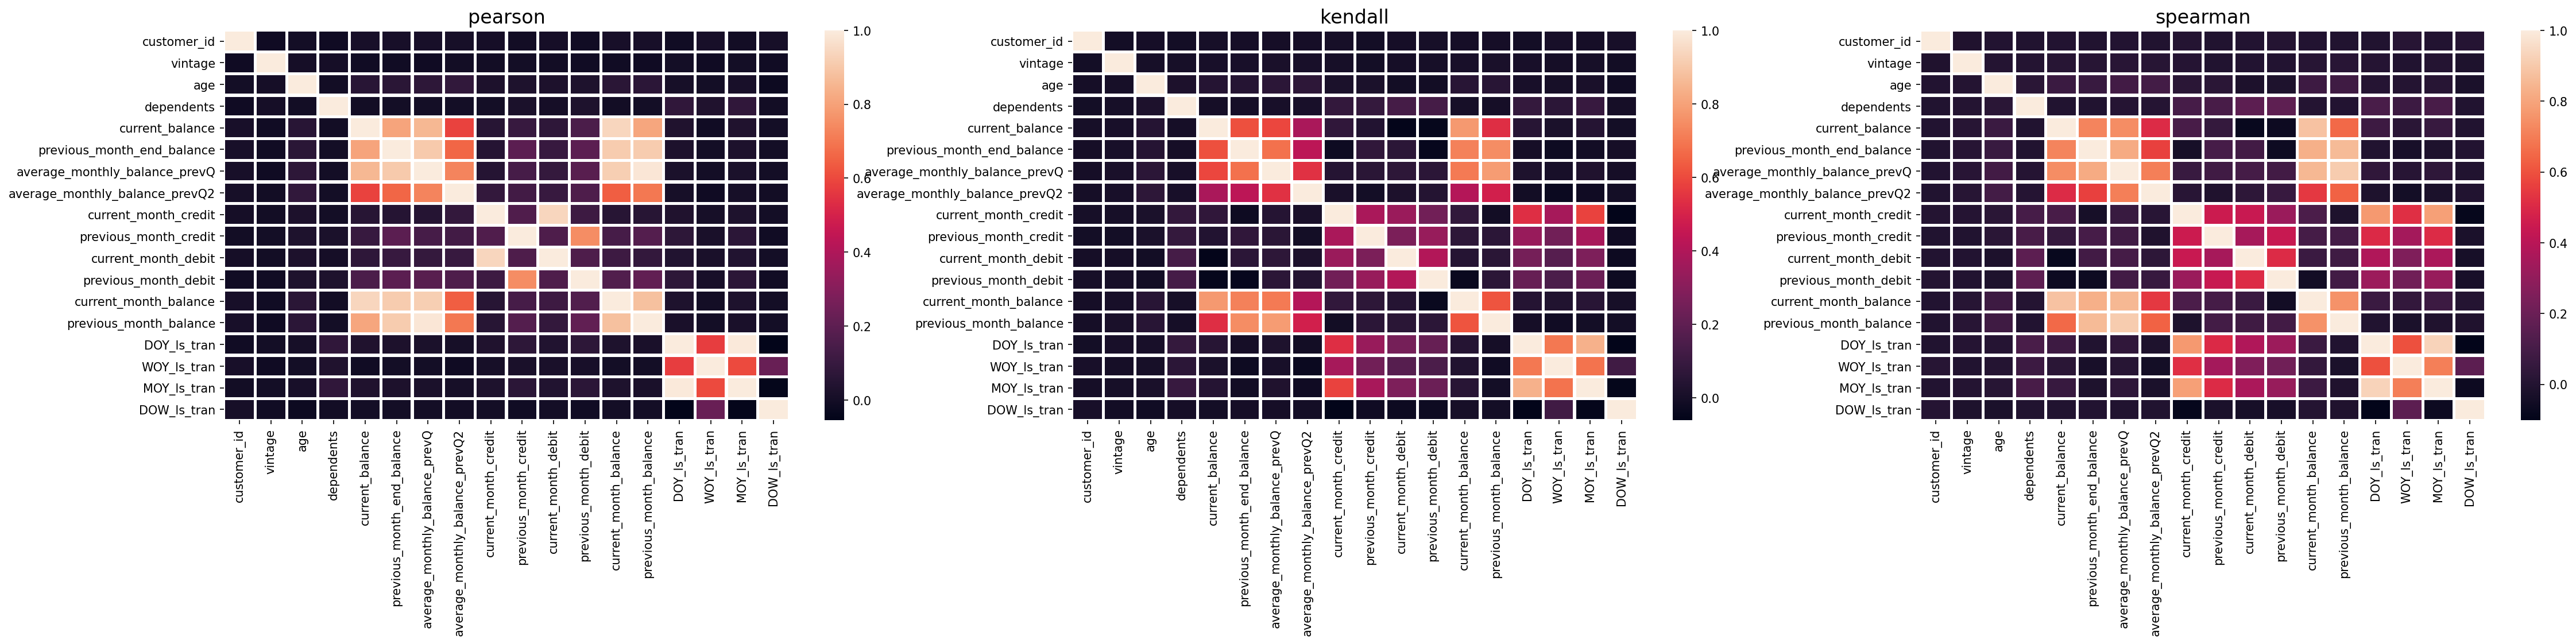

In [41]:
## plotting heatmap using all methods for all num variables
plt.figure(figsize = (36,6), dpi=150)
for j,i in enumerate(['pearson', 'kendall','spearman']):
    plt.subplot(1, 3, j+1)
    correlation = numerical.dropna().corr(method = i)
    sns.heatmap(correlation, linewidth = 2)
    plt.title(i, fontsize = 16)

* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the transaction variables and balance variables.

In [42]:
# extracting transaction information from numerical data
var = []
var.extend(current_month)
var.extend(prev_month)
var.extend(previous_quarters)

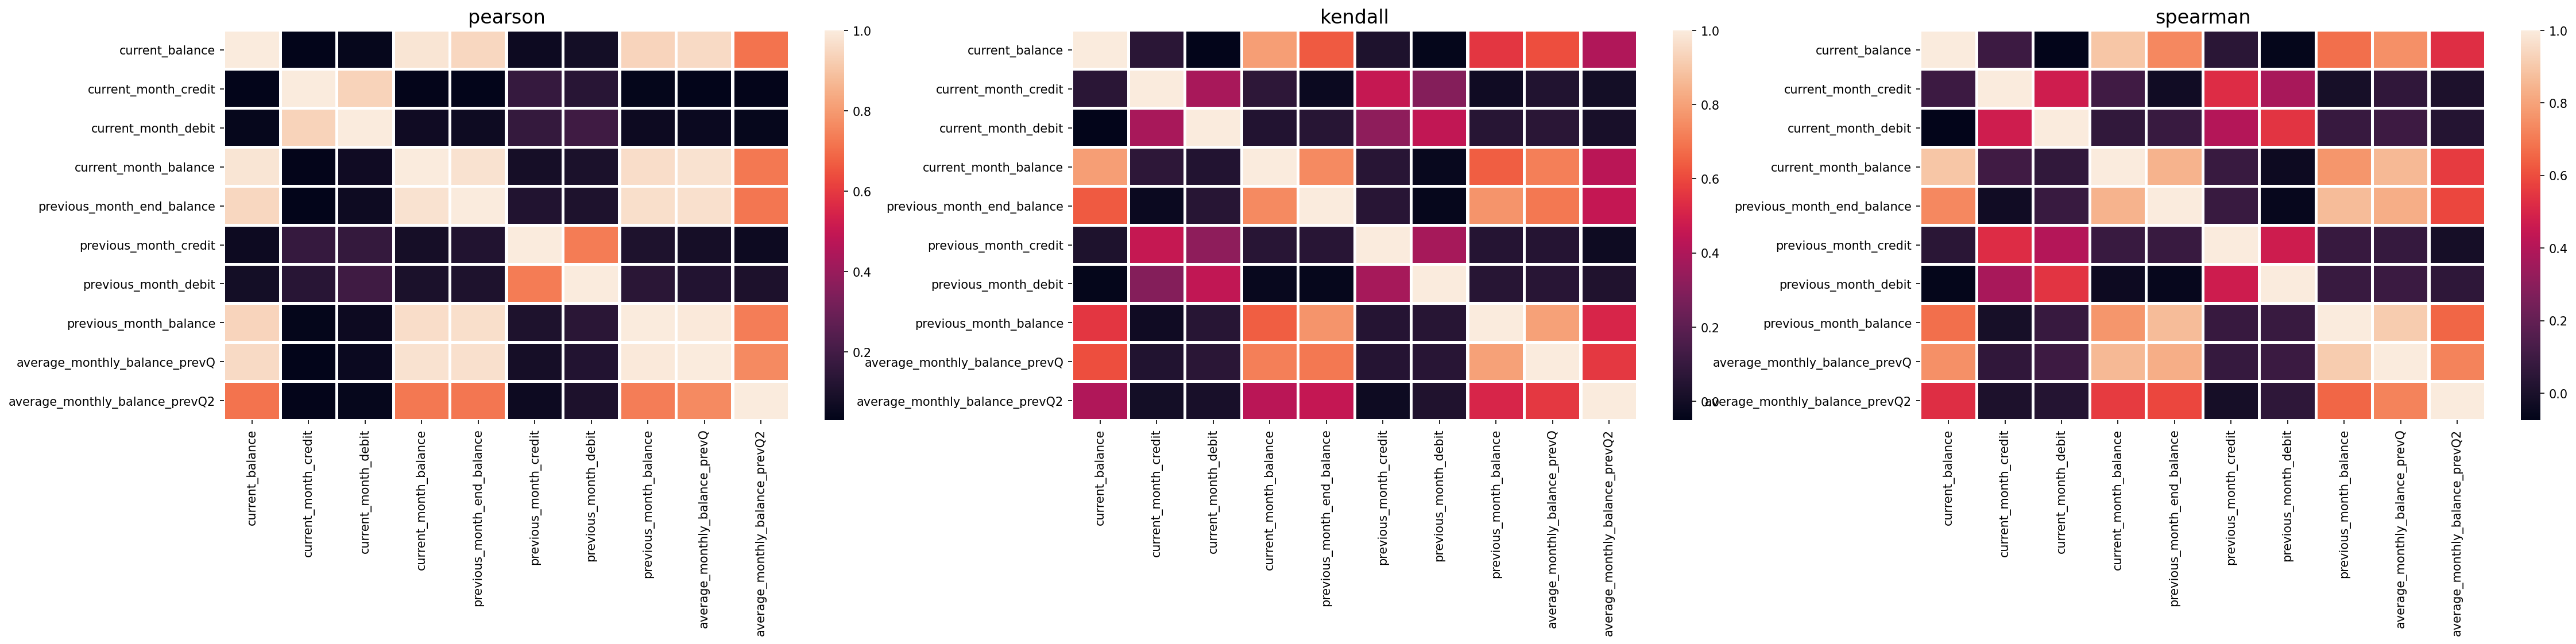

In [43]:
plt.figure(figsize =(36,6), dpi = 150)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation = numerical[var].dropna().corr(method = i)
    sns.heatmap(correlation, linewidth = 2)
    plt.title(i, fontsize=16)

**Inferences:**


1.   Transaction variables like credit/debit have a strong correlation among themselves.
2.  Balance variables have strong correlation among themselves.
3.   Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.

In [44]:
## grouping variables 
transactions = ['current_month_credit','current_month_debit', 'previous_month_credit', 'previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

In [45]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 840x560 with 0 Axes>

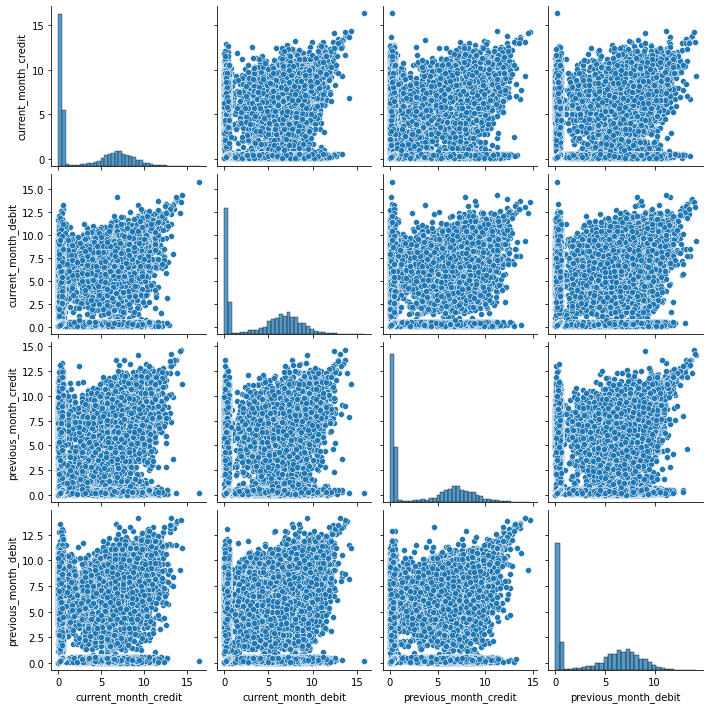

In [46]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

**Inferences**
1.    This validates the high correlation between the transaction variables.
2.    This high correlation can be used for feature engineering during the later stages.

<Figure size 840x560 with 0 Axes>

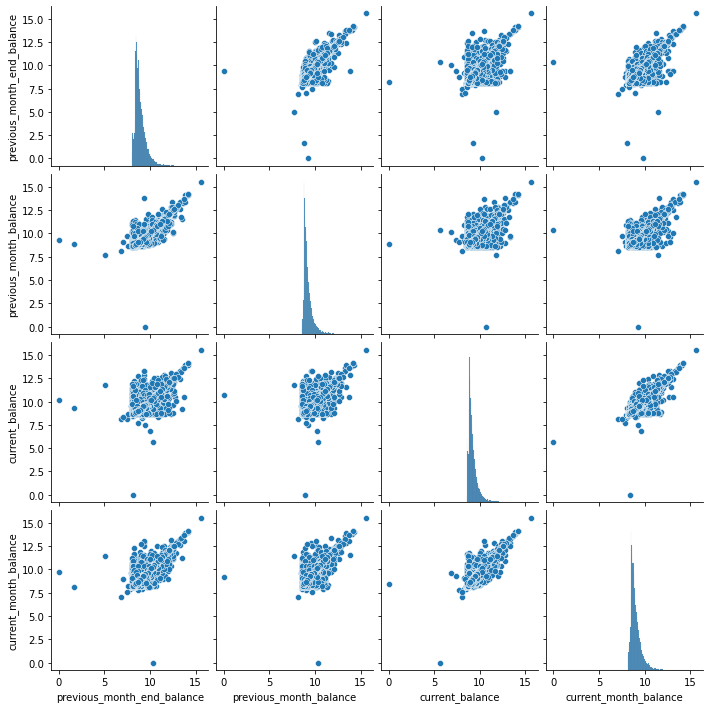

In [47]:
# balance variables
plt.figure(dpi=140)
sns.pairplot(numerical[balance])

**Inferences**
1.    This validates the high correlation between the balance variables.
2.    This high correlation can be used for feature engineering during the later stages.

<AxesSubplot:xlabel='average_monthly_balance_prevQ', ylabel='average_monthly_balance_prevQ2'>

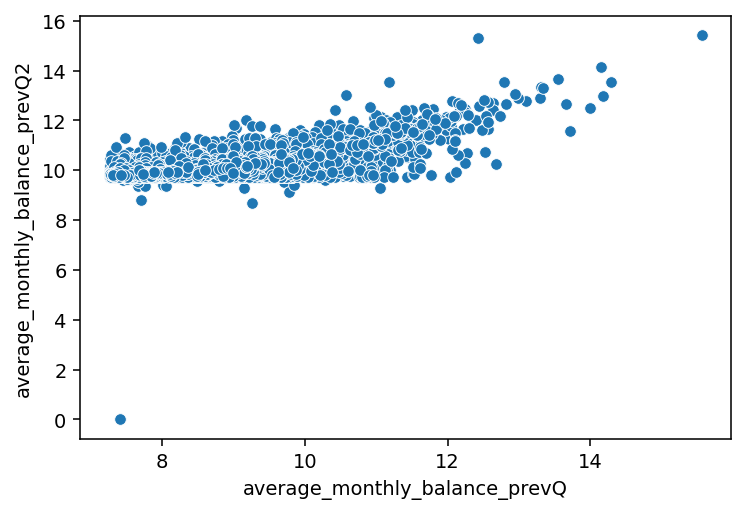

In [48]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(x=numerical['average_monthly_balance_prevQ'], y=numerical['average_monthly_balance_prevQ2'])

# multivariate analysis

## pivot table

We are using Pivot table to comply with the objective of identifying the Churning Customers Profile using multiple categorical features.
First, Let's use Gender, Occupation and Customer Net worth category and derive insights from the Pivot Table

### Gender, Occupation, Customer Net worth category with Churn

In [49]:
## assigning suitable data types for pivot table [category is not supported]
data['gender'] = data['gender'].astype('object')
data['occupation']= data['occupation'].astype('object')
data['customer_nw_category'] = data['customer_nw_category'].astype('object')
data['churn'] = data['churn'].astype('int')
data['city'] = data['city'].astype('float')
data['branch_code'] = data['branch_code'].astype('float')

In [50]:
data.pivot_table('churn',['gender','occupation'],'customer_nw_category', aggfunc = 'mean')*100

customer_nw_category           1          2          3
gender occupation                                     
Female company        100.000000   0.000000  66.666667
       retired         20.689655  11.219512  13.492063
       salaried        18.545455  14.849188  17.689016
       self_employed   18.111588  18.197035  18.920916
       student         10.404624  14.442413  15.034965
Male   company          0.000000   0.000000   0.000000
       retired         18.497110  14.251781  16.316640
       salaried        17.557252  16.410469  18.468702
       self_employed   22.832370  20.424978  21.465808
       student         16.969697  17.210145  18.208955

* __Highest number of churning customers__ are those __Male Customers__ who lie in __2 net worth category__ and belong to __Self-employed__ profession
* Proportion wise for net worth category 1, Approximately 22% __Male customers__ who belong to the __Self-employed__ profession are churning
* Proportion wise for net worth category 2, 20% __Male customers__ who belong to the __Self-employed__ profession are churning
* For net worth category 3, Approximately 21% __Male customers__ who belong to the __Self-employed__ profession are churning

* In all the cases of Customer net worth category, __Self-employed Male customers__ are more likely to churn

* This would be interesting to dig deeper and find out if the __"Self-employed Male"__ Customers are more churning more

Let's use one continuous variable Age, and two categorical variables, Gender, and Occupation to derive insights related to profiles of customers who are churning.
We will have to convert continuous variable into categorical variable for efficiently using Pivot Table. Here we are binning age into three intervals

In [51]:
age = pd.cut(data['age'], [0,25,50,100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc = 'sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]          0        0         7             27      102
       (25, 50]         2        0       226            852       38
       (50, 100]        1       52        70            605        0
Male   (0, 25]          0        0        17             74      137
       (25, 50]         0        2       563           1107       47
       (50, 100]        0      251       264            698        0

In [52]:
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc = 'mean')*100

occupation        company    retired   salaried  self_employed    student
gender age                                                               
Female (0, 25]        NaN        NaN  15.909091      21.774194  13.421053
       (25, 50]      50.0   0.000000  16.096866      19.163293  15.510204
       (50, 100]     50.0  13.541667  17.948718      17.370083   0.000000
Male   (0, 25]        0.0        NaN  20.987654      30.327869  16.545894
       (25, 50]       0.0  14.285714  17.349769      21.886121  21.076233
       (50, 100]      0.0  15.493827  17.165150      19.340538   0.000000

* We have created three bins for the age variable dividing age into 3 groups 0-25, 25-50 and 50-100
* Highest number of Customers are churning from __Male category__ who belong to the age group of __(25,50)__ and are professionally __self employed__
* Highest Proportion of Customers are churning from __Male category__ who belong to the age group of __(0,25)__ and are professionally __self employed__
* Here also __Self Employed Male customers__ are churning more than any other combination of categories

In [53]:
balance = pd.qcut(data['current_balance'], q=3)
data.pivot_table('churn',['gender', age],[balance, 'occupation'], aggfunc = 'sum')

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                       0       0        5            22      64   
       (25, 50]                      1       0      146           522      20   
       (50, 100]                     1      34       45           353       0   
Male   (0, 25]                       0       0       12            52      95   
       (25, 50]                      0       0      328           694      30   
       (50, 100]                     0     156      150           364       0   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                      0       0        1             4      21   
       (25, 50]                     1       0       51           171       7   
       (50, 100]                    0       8       14           125       0   
Male   (0, 25]                      0       0        4            12      20   
       (25, 50]                     0       1      129           208      10   
       (50, 100]                    0      39       52           143       0   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                        0       0        1             1      17  
       (25, 50]                       0       0       29           159      11  
       (50, 100]                      0      10       11           127       0  
Male   (0, 25]                        0       0        1            10      22  
       (25, 50]                       0       1      106           205       7  
       (50, 100]                      0      56       62           191       0

In [54]:
balance = pd.qcut(data['current_balance'], q=3)
data.pivot_table('churn',['gender', age],[balance, 'occupation'], aggfunc = 'mean')*100

current_balance  (-5503.961, 2202.177]                                      \
occupation                     company    retired   salaried self_employed   
gender age                                                                   
Female (0, 25]                     NaN        NaN  26.315789     38.596491   
       (25, 50]                   50.0   0.000000  32.300885     33.677419   
       (50, 100]                 100.0  28.333333  35.156250     30.642361   
Male   (0, 25]                     0.0        NaN  35.294118     52.000000   
       (25, 50]                    0.0   0.000000  33.367243     38.901345   
       (50, 100]                   0.0  29.489603  32.119914     33.060854   

current_balance             (2202.177, 5114.317]                        \
occupation          student              company    retired   salaried   
gender age                                                               
Female (0, 25]    21.262458                  NaN        NaN   5.882353   
       (25, 50]   25.974026                100.0   0.000000   9.826590   
       (50, 100]   0.000000                  NaN   5.633803  11.200000   
Male   (0, 25]    28.189911                  NaN        NaN  14.285714   
       (25, 50]   44.117647                  0.0  16.666667  11.889401   
       (50, 100]        NaN                  0.0   6.927176  10.766046   

current_balance                           (5114.317, 5905904.03]             \
occupation       self_employed    student                company    retired   
gender age                                                                    
Female (0, 25]       10.810811   7.167235                    NaN        NaN   
       (25, 50]      10.891720   6.862745                    0.0        NaN   
       (50, 100]     11.052166        NaN                    0.0   8.196721   
Male   (0, 25]       14.117647   6.493506                    NaN        NaN   
       (25, 50]      13.214740  12.345679                    0.0  20.000000   
       (50, 100]     12.565905        NaN                    0.0  10.606061   

current_balance                                       
occupation         salaried self_employed    student  
gender age                                            
Female (0, 25]    12.500000      3.333333  10.240964  
       (25, 50]    6.697460     11.990950  16.666667  
       (50, 100]   8.029197     10.583333        NaN  
Male   (0, 25]     5.263158     16.949153  12.021858  
       (25, 50]    9.005947     12.058824   9.459459  
       (50, 100]  10.544218     13.941606   0.000000

* Current balance is divided into 3 quantiles
* It is visible at first look that for __low current balance__ more number of customers are churning
* For the first quantile of current balance, More than __18%__ (overall average churning) of customers are churning and for second and third quantile percentage of churning customers is less than 18%
* In first quantile of current balance, for __self employed profession__ as the age increases for customers, their churning proportion decreases. This means that __Young Self employed Customers__ are more prone to churn 
* There is a visible gap in proportion of Self employed females who lie in the age group of (0,25) and Self employed Males who lie in the same group. __Young Male Self employed customers__ are churning more than young female self employed customers

## boxplot

** in order to comply with identification of customers churning, we will plot grouped boxplot.   

In [55]:
def Group_boxplot(data, cont, cat1 , cat2):
    #boxplot
    sns.boxplot(x= cat1, y=cont, hue=cat2, data = data, orient = 'v')
    plt.title('relation boxplot')

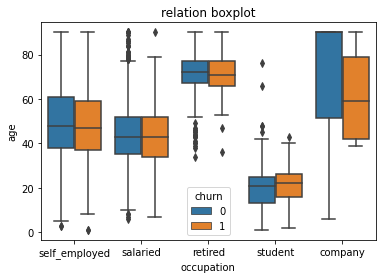

In [56]:
Group_boxplot(data, 'age', 'occupation','churn')

We can notice here that 
* For __Self-employed__ profession churning customers are slightly __younger__ than non churning customers
* In the retired occupation for non churning customers, there are many outliers that indicate __young people who retire early are not churning__


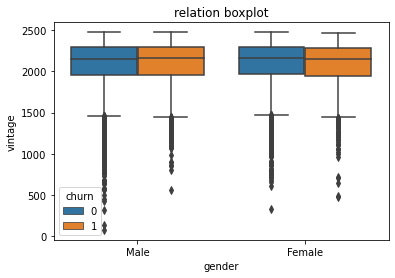

In [57]:
## with vintage and gender
Group_boxplot(data, 'vintage', 'gender', 'churn')

# pair plot

churn vs current and prev month balances

Now, we will check the relationship of the some transactional variables along with the churning status. Here conversion to log is important here as we have a lot of outliers and visualization will be difficult for it.

In [58]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
data1 = pd.DataFrame()

for i in balance_cols:
    data1[str('log_')+ i] = np.log(data[i] + 6000)

log_balance_cols = data1.columns

In [59]:
data1['churn'] = data['churn']

We will use the brilliant pairplot function from Seaborn which supports displaying relationship between multiple variables. It displays the scatter plot between a pair of feature and also displays the distribution

Here I have included the following:
* Log of current balance & previous month end balance
* Log of average monthly balance of current and previous month
* Churn is represented by the color here (Orange - Churn, Blue - Not Churn)

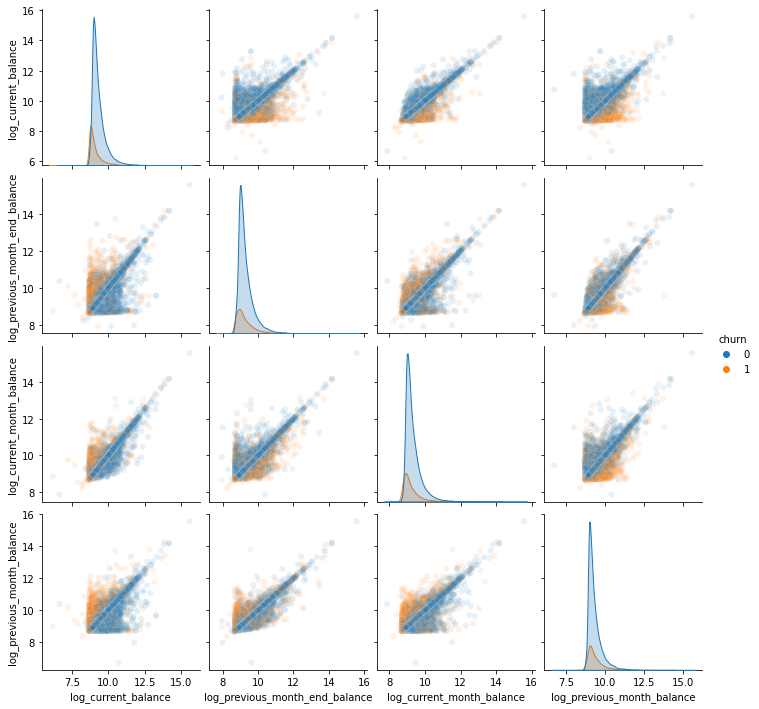

In [60]:
sns.pairplot(data1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

The distribution for these features look similar. We can make the following conclusions from this:
* There is high correlation between the previous and current month balances which is expected
* The distribution for churn and not churn is slightly different for both the cases

### Credit and Debits for current and previous months

Total credit and debit amounts for the current and previous can be clubbed into the same category. Let us again use the pair plot to check distributions and scatter plots.

In [61]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
data1 = pd.DataFrame()

for i in cr_dr_cols:
    data1[str('log_')+ i] = np.log(data[i])

log_dr_cr_cols = data1.columns

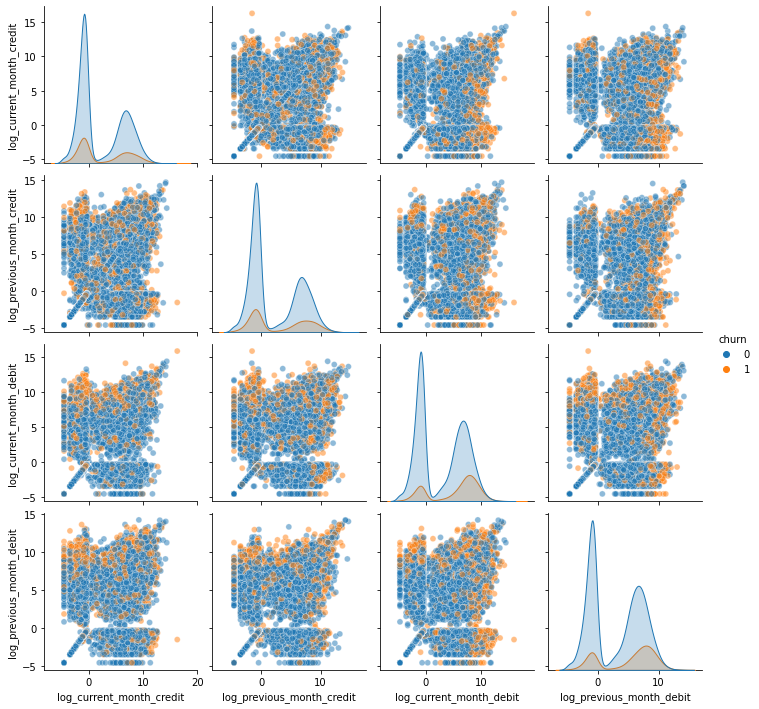

In [62]:
data1['churn']= data['churn']
sns.pairplot(data1,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Both credit and debit patterns show significant difference in distributions for churned and non churned customers.
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might turn out to be an important feature

## Encoding
* Encoding the variables using get dummies pandas function so every variable has numerical value attached to it

In [63]:
data_encoded = pd.get_dummies(data, drop_first = True)
data_encoded

,customer_id,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,WOY_ls_tran,MOY_ls_tran,DOW_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,1,2101,66,0,187.0,755.0,1458.71,1458.71,1458.71,1449.07,...,21.0,5.0,1.0,1,0,0,1,0,1,0
1,2,2348,35,0,NaN,3214.0,5390.37,8704.66,7799.26,12419.41,...,44.0,11.0,4.0,1,0,0,1,0,1,0
2,4,2194,31,0,146.0,41.0,3913.16,5815.29,4910.17,2815.94,...,NaN,NaN,NaN,1,0,1,0,0,1,0
3,5,2329,90,<NA>,1020.0,582.0,2291.91,2291.91,2084.54,1006.54,...,32.0,8.0,1.0,0,0,0,1,0,1,0
4,6,1579,42,2,1494.0,388.0,927.72,1401.72,1643.31,1871.12,...,44.0,11.0,6.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,0,1020.0,1207.0,1076.43,1076.43,2282.19,2787.70,...,43.0,10.0,1.0,0,0,0,0,1,1,0
28378,30298,1537,34,0,1046.0,223.0,3844.10,4069.21,3668.83,3865.55,...,51.0,12.0,1.0,0,0,0,1,0,1,0
28379,30299,2376,47,0,1096.0,588.0,65511.97,61017.55,53444.81,21925.81,...,1.0,12.0,1.0,1,0,1,0,0,1,0
28380,30300,1745,50,3,1219.0,274.0,1625.55,1625.55,1683.20,1857.42,...,NaN,NaN,NaN,1,0,0,1,0,0,1


## missing values replaced by MODE

In [64]:
def fill_mode(df):
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace = True)

In [65]:
fill_mode(data_encoded)
data_encoded

,customer_id,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,WOY_ls_tran,MOY_ls_tran,DOW_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,1,2101,66,0,187.0,755.0,1458.71,1458.71,1458.71,1449.07,...,21.0,5.0,1.0,1,0,0,1,0,1,0
1,2,2348,35,0,1020.0,3214.0,5390.37,8704.66,7799.26,12419.41,...,44.0,11.0,4.0,1,0,0,1,0,1,0
2,4,2194,31,0,146.0,41.0,3913.16,5815.29,4910.17,2815.94,...,52.0,12.0,1.0,1,0,1,0,0,1,0
3,5,2329,90,0,1020.0,582.0,2291.91,2291.91,2084.54,1006.54,...,32.0,8.0,1.0,0,0,0,1,0,1,0
4,6,1579,42,2,1494.0,388.0,927.72,1401.72,1643.31,1871.12,...,44.0,11.0,6.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,0,1020.0,1207.0,1076.43,1076.43,2282.19,2787.70,...,43.0,10.0,1.0,0,0,0,0,1,1,0
28378,30298,1537,34,0,1046.0,223.0,3844.10,4069.21,3668.83,3865.55,...,51.0,12.0,1.0,0,0,0,1,0,1,0
28379,30299,2376,47,0,1096.0,588.0,65511.97,61017.55,53444.81,21925.81,...,1.0,12.0,1.0,1,0,1,0,0,1,0
28380,30300,1745,50,3,1219.0,274.0,1625.55,1625.55,1683.20,1857.42,...,52.0,12.0,1.0,1,0,0,1,0,0,1


### Segregating variables: Independent and Dependent Variables

In [66]:
## dropping insignificant variable 
data_encoded = data_encoded.drop(columns = ['customer_id'])

In [67]:
## seperating dependent and independent variable
x = data_encoded.drop(['churn'], axis = 1)
y = data_encoded['churn']
x.shape, y.shape

((28382, 26), (28382,))

## train test split

In [68]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3, random_state= 56 )
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((19867, 26), (8515, 26), (19867,), (8515,))

## scaling using min_max_scaler

In [69]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
cols = x.columns

In [70]:
x_train_scaled = scale.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns= cols)
x_train_scaled

,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,WOY_ls_tran,MOY_ls_tran,DOW_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.821214,0.089888,0.000000,0.398058,0.070906,0.001611,0.001304,0.000463,0.003948,1.557235e-07,...,0.882353,0.909091,0.500000,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.846225,0.550562,0.000000,0.549150,0.053964,0.001490,0.001174,0.000377,0.003987,4.604000e-07,...,0.862745,0.909091,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.815655,0.370787,0.000000,0.618932,0.174650,0.001550,0.001982,0.001021,0.004949,1.015588e-07,...,0.411765,0.363636,0.666667,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.944419,0.348315,0.000000,0.376214,0.073206,0.001373,0.001302,0.000467,0.003682,2.572824e-07,...,1.000000,1.000000,0.166667,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.769801,0.674157,0.000000,0.618932,0.206860,0.001354,0.001035,0.000273,0.003780,2.143568e-05,...,0.980392,1.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19862,0.868921,0.393258,0.038462,0.088592,0.008366,0.001391,0.001072,0.000277,0.003877,4.265471e-07,...,0.470588,0.454545,0.500000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19863,0.882816,0.786517,0.000000,0.618932,0.012131,0.004499,0.004031,0.003449,0.006849,1.083294e-07,...,0.843137,0.818182,0.333333,1.0,0.0,1.0,0.0,0.0,1.0,0.0
19864,0.836962,0.404494,0.000000,0.036408,0.124242,0.001992,0.001691,0.000698,0.004017,3.249883e-07,...,0.862745,0.909091,0.833333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
19865,0.631774,0.337079,0.000000,0.932646,0.272119,0.002769,0.000705,0.000131,0.003490,1.776856e-02,...,1.000000,1.000000,0.166667,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [71]:
x_test_scaled = scale.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= cols)
x_test_scaled

,vintage,age,dependents,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,WOY_ls_tran,MOY_ls_tran,DOW_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_2,customer_nw_category_3
0,0.933389,0.516854,0.02,0.747119,0.021415,0.007608,0.002058,0.000782,0.020180,6.173672e-06,...,1.000000,1.000000,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.841799,0.337079,0.00,0.664645,0.018476,0.010002,0.004200,0.002311,0.019808,1.304010e-08,...,0.843137,0.818182,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.917985,0.629213,0.00,0.374166,0.047869,0.006766,0.001731,0.000072,0.015485,4.482534e-08,...,0.666667,0.636364,0.500000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.713156,0.269663,0.00,0.618557,0.231787,0.005245,0.000518,0.003200,0.042029,3.912030e-08,...,0.803922,0.818182,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.927977,0.853933,0.00,0.248029,0.068864,0.005660,0.000832,0.000854,0.017640,1.793014e-08,...,0.058824,0.000000,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,0.913405,0.887640,0.00,0.009096,0.011127,0.007996,0.001112,0.000399,0.015538,1.746803e-04,...,0.941176,1.000000,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8511,0.860533,0.471910,0.00,0.784718,0.572538,0.014359,0.007980,0.006496,0.030879,2.934022e-08,...,0.921569,0.909091,0.666667,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8512,0.778518,0.617978,0.00,0.924803,0.030443,0.010603,0.004660,0.002819,0.021680,8.150062e-09,...,0.745098,0.727273,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8513,0.947127,0.382022,0.00,0.618557,0.674575,0.010072,0.006626,0.003964,0.030071,4.482534e-08,...,0.843137,0.909091,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Model Building

In [75]:
## importing logistic regression and accuracy score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
logreg = LogReg()

## fitting model
logreg.fit(x_train, y_train)

## prediction of train set
predict_train = logreg.predict(x_train)
predict_train

## calculating accuracy score for train set
ktn = accuracy_score(predict_train, y_train)
print('accuracy score for train set', ktn)

## prediction for test 
predict_test = logreg.predict(x_test)
predict_test
kts = accuracy_score(predict_test, y_test)
print('accuracy score for test set', kts)

accuracy score for train set 0.8243318065133135
accuracy score for test set 0.8258367586611861


C:\anacondafolder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
# using regularization
C = [10, 1, .1, .001]

for c in C:
    clf = LogReg(penalty='l2', C=c,)
    clf.fit(x_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(x_train, y_train))
    print('Test accuracy:', clf.score(x_test, y_test))
    print('')

C:\anacondafolder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 10
Coefficient of each feature: [[-6.54224189e-04 -3.21539972e-05  3.30253709e-07 -1.18879866e-04
   9.99193339e-05 -1.69402907e-04  4.73480974e-07  1.90318697e-04
  -9.84388507e-06 -6.34703131e-06 -3.51322269e-06  8.48395241e-06
   5.98424152e-06 -2.06170080e-05 -3.07887389e-05 -9.02126964e-05
  -1.30784204e-05 -2.99643320e-06 -3.83960231e-07 -1.15976376e-08
  -1.69865070e-07 -2.33134836e-07  8.39530111e-08 -1.52054376e-07
  -3.53603158e-07 -5.56542922e-08]]
Training accuracy: 0.824029798157749
Test accuracy: 0.8259541984732824



C:\anacondafolder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 1
Coefficient of each feature: [[-6.61255962e-04 -3.55423295e-05  4.06494017e-07 -9.65969281e-05
   9.54518573e-05 -1.71289150e-04 -2.46929499e-06  1.83114242e-04
  -9.32936054e-06 -6.83595919e-06 -3.66582233e-06  9.27572229e-06
   5.76371631e-06 -1.56394153e-05 -2.45175258e-05 -9.08803250e-05
  -1.33608279e-05 -3.00498091e-06 -3.13283535e-07  1.30129786e-08
  -1.96960925e-07 -2.62742918e-07  1.28331025e-07 -1.74499530e-07
  -3.91042974e-07 -5.10585351e-08]]
Training accuracy: 0.8243318065133135
Test accuracy: 0.8258367586611861



C:\anacondafolder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 0.1
Coefficient of each feature: [[-6.59448624e-04 -3.32594847e-05  3.53088495e-07 -1.13645832e-04
   9.90716618e-05 -1.70950240e-04 -1.86600735e-06  1.87153582e-04
  -9.63036373e-06 -6.67285979e-06 -3.91307696e-06  9.22928284e-06
   6.11976899e-06 -1.92703502e-05 -2.57466337e-05 -9.08607848e-05
  -1.32244964e-05 -3.01421735e-06 -3.66398354e-07 -4.83234806e-09
  -1.78238562e-07 -2.42535058e-07  9.66464611e-08 -1.59039431e-07
  -3.65788639e-07 -5.46784273e-08]]
Training accuracy: 0.8242311370614587
Test accuracy: 0.8263065179095713

C: 0.001
Coefficient of each feature: [[-6.60319944e-04 -3.52693816e-05  4.00654524e-07 -9.93292823e-05
   9.40601661e-05 -1.71845305e-04 -1.31610065e-06  1.88199024e-04
  -9.63162927e-06 -6.76038288e-06 -3.80635797e-06  9.03089217e-06
   6.08508230e-06 -1.79868164e-05 -2.75475159e-05 -9.07804519e-05
  -1.33342302e-05 -3.00270881e-06 -3.18416012e-07  1.10846043e-08
  -1.94873009e-07 -2.60387416e-07  1.24956960e-07 -1.72770967e-07
  -3.87947097e-07 -5.1710

C:\anacondafolder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
